In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_23/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# Regularización (Integrador)

En este lab vamos a practicar regularización. El [dataset](http://data.princeton.edu/wws509/datasets/#salary) consiste en datos de salarios de 52 profesores en una pequeña universidad, categorizados por género, ranking, título más alto, y años de servicio. (Si no está en el link o el link está caído, podés encontrar el dataset en la carpeta Data del Campus Virtual).

### Objetivos de aprendizaje

- Practicar el trabajo con variables categóricas y la generación de variables dummy.
- Utilizar regularización para generar modelos con mayor poder de generalización

### Requerimientos

El dataset contiene tres variables categóricas, cada una con dos o tres valores: "sx", "dg", "rk". Tu misión es la siguiente:.
* Crear variables dummy para cada una de las variables categóricas.
* Usando pandas `value_counts()` mirar la distribución de estas variables
* Usando seaborn, hacer [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) de los salarios usando estas variables.


* Vamos a entrenar modelos lineales para predecir el salario de los profesores 'sl'
* Usando pandas, seleccionar una muestra de datos (set de entrenamiento) y ajustar un modelo lineal a esa muestra.
* Ajustar un modelo al dataset solamente con las variables cuantitativas y luego con el dataset completo.

* Aplicar este modelo ajustado al set de testeo y comparar los ajustes.
* Usar regularizaciónn (ej. RidgeRegression o Lasso), ajustando el modelo sobre el mismo set de entrenamiento y midiendo la bondad de ajuste sobre el set de testeo. Cómo se comparan los ajustes sobre el set de testo con y sin regularización?

Ejercicio bonus:
* Predecir años de servicio "yr" o años desde obtención del título "yd" a partir del salario y usando otras variables si lo desea. Ayuda regularizar?

### Material auxiliar
- [Modelos lineales de scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html), incluyendo regularizacion
- [Crear variables dummy con pandas](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [2]:
# Importamos las librerías

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../Data/salary.dat', delim_whitespace=True)

In [4]:
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [5]:
df.shape

(52, 6)

male      38
female    14
Name: sx, dtype: int64


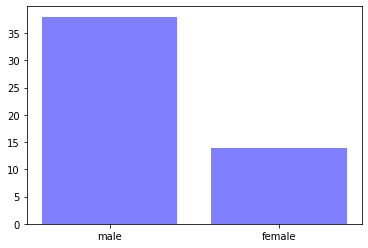

full         20
assistant    18
associate    14
Name: rk, dtype: int64


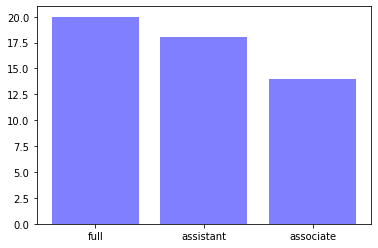

doctorate    34
masters      18
Name: dg, dtype: int64


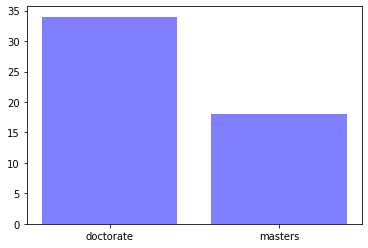

In [6]:
# Aplicar value_counts() a las series "sx", "dg", and "rk"

categories = ['sx', 'rk', 'dg']

for category in categories:
    print(df[category].value_counts())
    plt.bar(df[category].value_counts().index, df[category].value_counts().values, color='b',\
            alpha=0.5)
    plt.show()

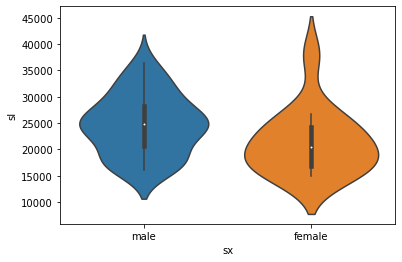

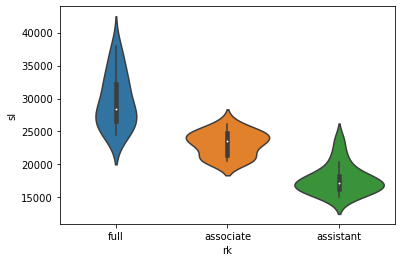

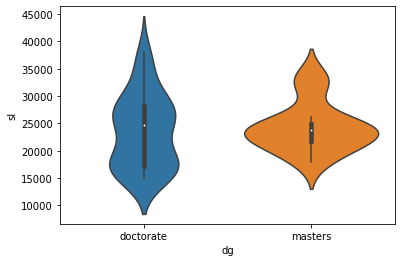

In [7]:
# Hacer unos violinplots a las series "sx", "dg", and "rk"

for category in categories:
    sns.violinplot(x=category, y='sl', data=df)
    plt.show()

# Repetir para "dg" y "rk"

In [8]:
# Crear variables "dummy"

for category in categories:
    serie = df[category]
    dummies = pd.get_dummies(serie, drop_first= True, prefix=category)
    df = pd.concat([df, dummies], axis=1)

df.head()

,sx,rk,yr,dg,yd,sl,sx_male,rk_associate,rk_full,dg_masters
0,male,full,25,doctorate,35,36350,1,0,1,0
1,male,full,13,doctorate,22,35350,1,0,1,0
2,male,full,10,doctorate,23,28200,1,0,1,0
3,female,full,7,doctorate,27,26775,0,0,1,0
4,male,full,19,masters,30,33696,1,0,1,1


In [30]:
# Ajustamos el modelo usando solamente las variables cuantitativas y MCO

X = df[['yr', 'yd']]
y = df['sl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

lm = linear_model.LinearRegression()

# model_1 = lm.fit(X_train, y_train)

# print('Score model_1:', model_1.score(X_test, y_test))

In [31]:
444444Score model_1: 0.27287811791681993

SyntaxError: invalid syntax (<ipython-input-31-fa39a8285b0a>, line 1)

In [36]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=10)

cv_scores = cross_val_score(lm, X_train, y_train, cv=kf)
cv_scores.mean()

-0.9049590782108974

In [ ]:
444444

In [10]:
# Ajustamos el modelo usando solamente las variables cuantitativas aplicando regularización
#¿Hace falta normalizar los features antes aplicar regularización en este caso? ¿Qué unidades tienen los features?

lm_ridge = linear_model.RidgeCV(alphas=[0.1, 1, 10], normalize=True) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)

print('Score model_2:', model_2.score(X_test, y_test))

# ¿Mejoraron los resultados?

Score model_2: 0.2848352361800828


In [11]:
# Ahora entrenamos el modelo con todas las variables con MCO:

X_all = df.drop(['sx', 'rk', 'dg', 'sl'], axis=1) 

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.35, random_state=10)

model_3 = lm.fit(X_all_train, y_all_train)

print('Score model_3:', model_3.score(X_all_test, y_all_test))

Score model_3: 0.7414107015840765


In [12]:
# Ahora entrenamos el modelo con todas las variables con Ridge:

lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize=True, cv=3) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_4 = lm_ridge.fit(X_all_train, y_all_train)

print('Score model_4:', model_4.score(X_all_test, y_all_test))

# ¿Mejoraron los resultados?

Score model_4: 0.7413941838307327


In [13]:
lm_ridge.alpha_

1e-05

In [14]:
# Ahora entrenamos el modelo con todas las variables con Lasso:

lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25],\
                                        normalize=True, cv=3)

model_5 = lm_lasso.fit(X_all_train, y_all_train)

print('Score model_5:', model_5.score(X_all_test, y_all_test))

Score model_5: 0.7150650767426419


In [15]:
lm_lasso.alpha_

15.0

# Resultados

¿Cómo resultó la regularización?